In [12]:
import numpy as np

In [37]:
class Perceptron(object):
    def __init__(self, eta= 0.01, n_iter= 50, random_state=1):
        self.eta=eta
        self.n_iter= n_iter
        self.random_state= random_state
        
    def fit(self, X,y):
        rgen= np.random.RandomState(self.random_state)
        self.w_= rgen.normal(loc=0.0, scale=0.01,size=1+X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                errors=0
                for xi, target in zip(X,y):
                    update= self.eta * (target- self.predict(xi))
                    self.w_[1:] += update*xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]+ self.w_[0])
    
    def predict(self, X):
        return np.where(self.net_input(X)>= 0.0, 1,-1)
            

In [38]:
v1= np.array([1,2,3])
v2= 0.5*v1
np.arccos(v1.dot(v2)/ (np.linalg.norm(v1)))*np.linalg.norm(v2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [39]:
import os
import pandas as pd
s= os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-database', 'iris', 'iris.data')
df= pd.read_csv('iris.data')

In [40]:
import matplotlib.pyplot as plt

In [41]:
y= df.iloc[0:100,4].values
y= np.where(y== 'Iris-setosa', -1,1)
X= df.iloc[0:100,[0,2]].values

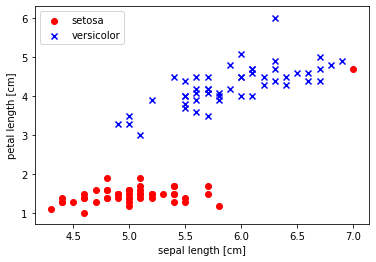

In [42]:
plt.scatter(X[:50,0], X[:50,1], color= 'red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color= 'blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc= 'upper left')
plt.show()

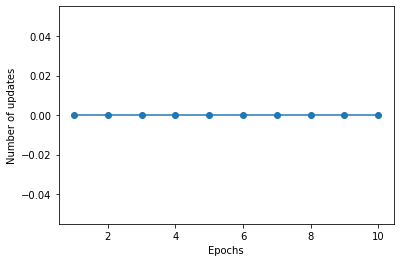

In [44]:
ppn= Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [67]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers= ('s','x','o','^','v')
    colors= ('red','blue', 'lightgreen', 'gray', 'cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max= X[:,0].min() -1, X[:,0].max()+1
    x2_min, x2_max= X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2, Z, alpha=0.3, cmap= cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())
    
        
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], 
                    y=X[y==cl,1], 
                    alpha=0.8, 
                    c=colors[idx],
                    label=cl, 
                    edgecolor= 'black')

      

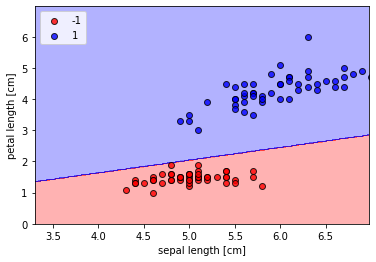

In [68]:
plot_decision_regions(X,y, classifier= ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [71]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter= n_iter
        self.random_state= random_state
        
    def fit(self, X,y):
        rgen= np.random.RandomState(self.random_state)
        self.w_= rgen.normal(loc=0.0, scale= 0.01, size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input= self.net_input(X)
            output= self.activation(net_input)
            errors= (y- output)
            self.w_[1:]+= self.eta * X.T.dot(errors)
            self.w_[0]+= self.eta* errors.sum()
            cost= (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+ self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>= 0.0, 1,-1)
    
    

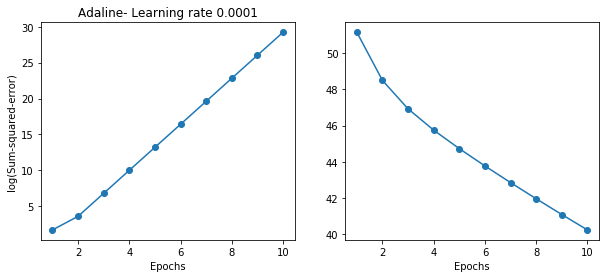

In [81]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize= (10,4))
ada1= AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker= 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline- Learning rate 0.01')

ada2= AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_, marker= 'o')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline- Learning rate 0.0001')

plt.show()

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
Note: you may need to restart the kernel to use updated packages.
